In [27]:
import geopandas as gpd
import osmnx as ox
import numpy as np
import networkx as nx
import pandas as pd
import pyrosm
import matplotlib.pyplot as plt
import contextily as cx 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
ox.__version__

'1.1.2'

In [28]:
# turn response caching off
ox.settings.use_cache=False  # If you are working on a project where you often re-download data, turning it off is recommended!

# turn it back on and turn on/off logging to your console
ox.settings.use_cache=True
ox.settings.log_console=False

In [29]:
gdf = ox.geometries_from_place("Copenhagen Municipality", tags = {"building": True})
gdf_proj = ox.project_gdf(gdf, to_crs="EPSG:25832")
fig, ax = ox.plot_footprints(gdf_proj, filepath="files/cph_buildings.png", dpi=400, save=True, show=False, close=True)

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


### Localising potential pubcrawl locations with the tags 'pub' and 'bar'
- 103 pubs 
- 452 bars

In [80]:
bar_tag = {'amenity': 'bar' }
pub_tag = {'amenity': 'pub' }

bars = ox.geometries_from_place(["Copenhagen Municipality"], bar_tag)
pubs = ox.geometries_from_place(["Copenhagen Municipality"], pub_tag)

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/opt/conda/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are depreca

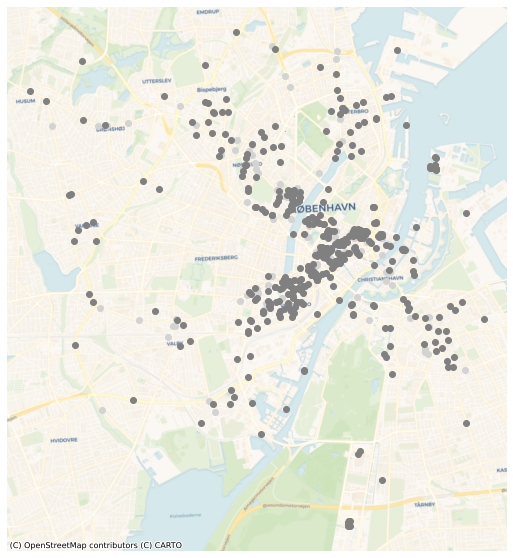

In [81]:
fig, ax = plt.subplots(figsize=(10,10))

pubs.to_crs("EPSG:25832").plot(ax=ax, color='lightgrey')
bars.to_crs("EPSG:25832").plot(ax=ax, color='grey')
ax.set_axis_off()
cx.add_basemap(
    ax=ax, 
    crs="EPSG:25832", 
    source=cx.providers.CartoDB.Voyager);

In [82]:
bars.length

/tmp/ipykernel_642/1907603759.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bars.length


element_type  osmid    
node          25869217     0.000000
              279472194    0.000000
              281063934    0.000000
              281998525    0.000000
              300410990    0.000000
                             ...   
way           36774301     0.001116
              88728055     0.000684
              147291402    0.000722
              324488860    0.000538
              625035646    0.000437
Length: 452, dtype: float64

In [83]:
#only 44 pubs/151 bars with available opening hours 
bars[ bars["opening_hours"].notna() ==True]

amenity fvst:navnelbnr                  name  \
element_type osmid                                                      
node         25869217        bar         501959            Black Swan   
             279472194       bar         795821              Drop Inn   
             281998525       bar         567872       Blågårds Apotek   
             571267064       bar         736025         Snoopy Bodega   
             664252429       bar         112137           Karrusellen   
...                          ...            ...                   ...   
             9929512719      bar        1227929             Midsommar   
             9956549050      bar            NaN                Curfew   
             10055230052     bar         714366                   NaN   
             10691958839     bar            NaN  Hos Rune Bottle shop   
way          324488860       bar         516689                Lidkøb   

                                        note  \
element_type osmid                             
node         25869217     Beer bar, 14 taps.   
             279472194                   NaN   
             281998525                   NaN   
             571267064                   NaN   
             664252429                   NaN   
...                                      ...   
             9929512719                  NaN   
             9956549050                  NaN   
             10055230052                 NaN   
             10691958839                 NaN   
way          324488860                   NaN   

                                                              opening_hours  \
element_type osmid                                                            
node         25869217     Mo-We 15:00-01:00, Th-Sa 15:00-02:00, Su 15:00...   
             279472194    Mo,Tu 14:00-24:00, We,Th 14:00-02:00, Fr,Sa 14...   
             281998525                 Mo-Th 14:00-02:00, Fr-Su 12:00-02:00   
             571267064                                          08:00-02:00   
             664252429                                          09:00-02:00   
...                                                                     ...   
             9929512719                                   Mo-Su 11:30-23:00   
             9956549050                Tu-Th 18:00-02:00; Fr-Sa 17:00-03:00   
             10055230052               We,Th,Sa 18:00-02:00; Fr 16:00-02:00   
             10691958839  Tu 13:00-18:00; We,Th 13:00-19:00; Fr,Sa 12:00...   
way          324488860                          16:00-02:00; Su 20:00-02:00   

                         ref:DK:cvr ref:DK:cvr:pnummer  smoking  \
element_type osmid                                                
node         25869217      33947178         1017132365  outside   
             279472194     38578553         1022372145      NaN   
             281998525     31896738         1014980128      NaN   
             571267064     31633605         1014667276      yes   
             664252429     18125773         1013141068      yes   
...                             ...                ...      ...   
             9929512719    39157063         1028121195      NaN   
             9956549050         NaN                NaN      NaN   
             10055230052   38631578         1022432628      NaN   
             10691958839        NaN                NaN  outside   
way          324488860     33955820         1017162396      NaN   

                         toilets:wheelchair  \
element_type osmid                            
node         25869217                    no   
             279472194                  NaN   
             281998525                  NaN   
             571267064                  NaN   
             664252429                  NaN   
...                                     ...   
             9929512719                 NaN   
             9956549050                 NaN   
             10055230052                NaN   
             10691958839         